### **SIR Model Parameters Estimation**

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from tqdm import tqdm


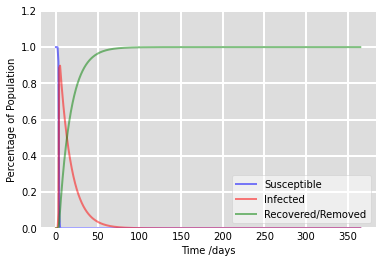

In [46]:
### ------------------- Parameters to Vary ------------------- ###

# lambda: number of people that a susceptible person interacts with per time step
# p: probability of getting infected if a susceptible person interacts with an infectious person
# gamma: recovery rate (recovery probability within one time step)
gamma = 1./14 # set lam = 2 vs 20, p = 0.3, gamma = 1/14

### ------------------- Fixed Parameters ------------------- ###

# Total population.
N = 300000000

# A grid of time points (in days) for the detecting period
t_set = np.linspace(0, 365, 366)

# Initial number of infected and immune individuals, I0 and R0.
I0, R0 = 10, 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# The SIR model differential equations.
def deriv_dynamic(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta(t) * S * I / N
    dIdt = beta(t) * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

x = np.linspace(0, 365, 366)

r0_true = np.array([5, 4, 4, 3, 2, 2, 1, 1, 0.5, 0.5])

def random_beta(t):
        
    if t < 36:
        return r0_true[0]
    if 36 <= t < 72:
        return r0_true[1]
    if 72 <= t < 108:
        return r0_true[2]
    if 108 <= t < 144:
        return r0_true[3]
    if 144 <= t < 180:
        return r0_true[4]
    if 180 <= t < 216:
        return r0_true[5]
    if 216 <= t < 248:
        return r0_true[6]
    if 248 <= t < 284:
        return r0_true[7]
    if 284 <= t < 320:
        return r0_true[8]
    if t > 320:
        return r0_true[9]


### ----------------- Dynamic Parameters ----------------- ###

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv_dynamic, y0, t_set, args=(N, random_beta, gamma))
S_syn, I_syn, R_syn = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t_set, S_syn/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t_set, I_syn/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t_set, R_syn/N, 'g', alpha=0.5, lw=2, label='Recovered/Removed')
ax.set_xlabel('Time /days')
ax.set_ylabel('Percentage of Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import scipy.optimize as optimize

In [47]:
est_R_0 = np.array([0.5] * 10)
t_set = np.linspace(0, 365, 366)

def loss_func(est_R_0, I_true):
    
    est_R_0 = np.abs(est_R_0)
    
    def random_beta(t):
        
        if t < 36:
            return est_R_0[0]
        if 36 <= t < 72:
            return est_R_0[1]
        if 72 <= t < 108:
            return est_R_0[2]
        if 108 <= t < 144:
            return est_R_0[3]
        if 144 <= t < 180:
            return est_R_0[4]
        if 180 <= t < 216:
            return est_R_0[5]
        if 216 <= t < 248:
            return est_R_0[6]
        if 248 <= t < 284:
            return est_R_0[7]
        if 284 <= t < 320:
            return est_R_0[8]
        if t > 320:
            return est_R_0[9]
    
    def deriv_dynamic(y, t, N, beta, gamma):
        S, I, R = y
        dSdt = - beta(t) * S * I / N
        dIdt = beta(t) * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt
    
    ret = odeint(deriv_dynamic, y0, t_set, args=(N, random_beta, gamma))
    _, I, _ = ret.T
    
    loss = mean_absolute_error(I_true, I)
    
    return loss


In [48]:
optimzer = optimize.minimize(loss_func, est_R_0, args=(I_syn,))

In [49]:
r0_pred = np.abs(optimzer.x)

In [50]:
r0_pred

array([4.99999999e+00, 1.64165348e+01, 8.05446209e+02, 2.02891914e+02,
       2.74985234e+00, 6.76954679e-01, 5.18959430e-01, 5.06319810e-01,
       5.00000000e-01, 5.00000000e-01])

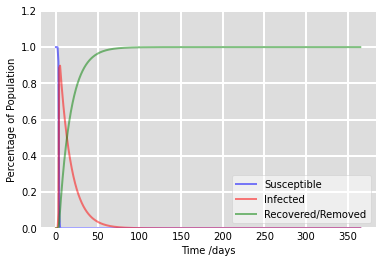

In [51]:
### ------------------- Parameters to Vary ------------------- ###

# lambda: number of people that a susceptible person interacts with per time step
# p: probability of getting infected if a susceptible person interacts with an infectious person
# gamma: recovery rate (recovery probability within one time step)
gamma = 1./14 # set lam = 2 vs 20, p = 0.3, gamma = 1/14

### ------------------- Fixed Parameters ------------------- ###

# Total population.
N = 300000000

# A grid of time points (in days) for the detecting period
t_set = np.linspace(0, 365, 366)

# Initial number of infected and immune individuals, I0 and R0.
I0, R0 = 10, 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# The SIR model differential equations.
def deriv_dynamic(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta(t) * S * I / N
    dIdt = beta(t) * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

x = np.linspace(0, 367, 368)

def random_beta(t):
        
    if t < 36:
        return r0_pred[0]
    if 36 <= t < 72:
        return r0_pred[1]
    if 72 <= t < 108:
        return r0_pred[2]
    if 108 <= t < 144:
        return r0_pred[3]
    if 144 <= t < 180:
        return r0_pred[4]
    if 180 <= t < 216:
        return r0_pred[5]
    if 216 <= t < 248:
        return r0_pred[6]
    if 248 <= t < 284:
        return r0_pred[7]
    if 284 <= t < 320:
        return r0_pred[8]
    if t > 320:
        return r0_pred[9]

### ----------------- Dynamic Parameters ----------------- ###

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv_dynamic, y0, t_set, args=(N, random_beta, gamma))
S_pred, I_pred, R_pred = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t_set, S_pred/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t_set, I_pred/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t_set, R_pred/N, 'g', alpha=0.5, lw=2, label='Recovered/Removed')
ax.set_xlabel('Time /days')
ax.set_ylabel('Percentage of Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

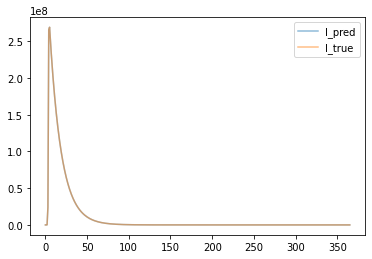

In [52]:
fig, ax = plt.subplots()

ax.plot(list(range(366)), I_pred, label="I_pred", alpha=0.5)
ax.plot(list(range(366)), I_syn, label="I_true", alpha=0.5)
plt.legend()
plt.show()